### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# checking the shape of the data (rows, columns)
print(data.shape)

(12684, 26)


2. Investigate the dataset for missing or problematic data.

In [5]:
# checking for missing data
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

Columns with missing values: ['car' 'Bar' 'CoffeeHouse' 'CarryAway' 'RestaurantLessThan20'
 'Restaurant20To50']


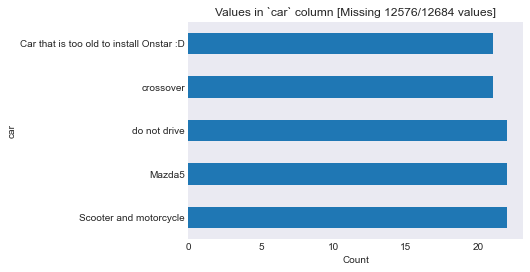

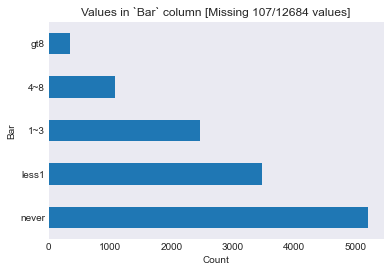

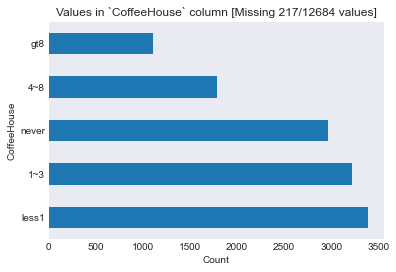

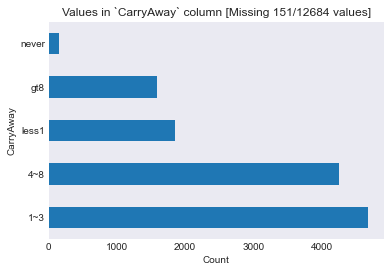

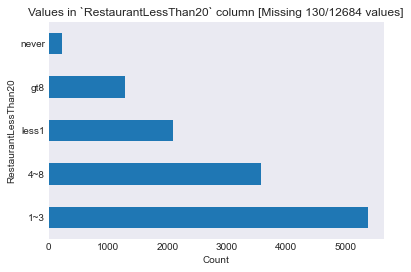

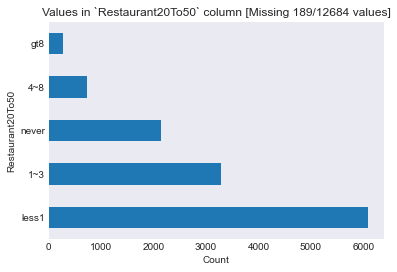

In [7]:
# we lose too many rows, we need to replace/fill the missing data
missing_mask = data.isna().sum()>1
missing_col_names = missing_mask.index.to_numpy()
missing_mask = missing_mask.values.tolist()
missing_col_names = missing_col_names[missing_mask]

print("Columns with missing values:", missing_col_names)
plt.style.use("seaborn-v0_8-dark")
for col in missing_col_names:
    # make a bar chart of the values of this column
    ax = data[col].value_counts().plot(kind="barh")
    n_missing = data[col].isna().sum()
    ax.set_title(f"Values in `{col}` column [Missing {n_missing}/{data.shape[0]} values]")
    ax.set_xlabel("Count")
    plt.show()

In [8]:
# we can see that the `car` column should be dropped completely
augmented_data = data.drop(columns=['car'])

# we can fill the values of `Bar` and `CoffeeHouse` to `never`
augmented_data['Bar'] = data['Bar'].fillna('never')
augmented_data['CoffeeHouse'] = data['CoffeeHouse'].fillna('never')

# drop the rest of the missing values
augmented_data = augmented_data.dropna()
n_rows = data.shape[0]

# check the shape of the data if we decide to drop missing values
# after the pre-processing
print(f"Losing {(n_rows-augmented_data.shape[0])/n_rows*100:.01f}% of data.")
print("Data shape if we drop missing values:", augmented_data.shape)

Losing 3.0% of data.
Data shape if we drop missing values: (12298, 25)


3% is acceptable to move forward. We still have +12K rows to work with.

4. What proportion of the total observations chose to accept the coupon? 



Proportion of observations that accepted the coupon: 56.70%


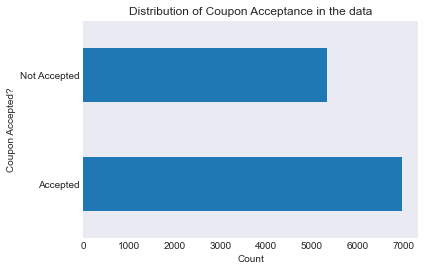

In [9]:
# plot the Coupon Acceptance distribution
col = augmented_data['Y'].apply(lambda v: "Accepted" if v else "Not Accepted") 
ax = col.value_counts().plot(kind='barh', title="Distribution of Coupon Acceptance in the data")
ax.set_xlabel("Count")
ax.set_ylabel("Coupon Accepted?")

# calculate the proportion of observations that accepted the coupon
acceptance_rate = augmented_data['Y'].mean()*100
print(f"Proportion of observations that accepted the coupon: {acceptance_rate:.02f}%")

5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Distribution of `Coupon` Column'}, xlabel='Count', ylabel='Coupon Type'>

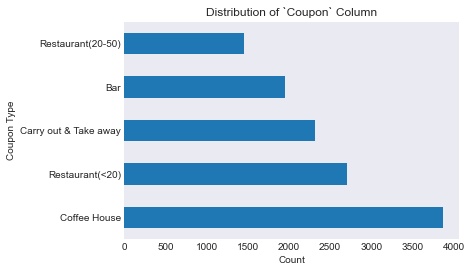

In [10]:
augmented_data.coupon.value_counts().plot(
    kind="barh", 
    xlabel="Count", 
    ylabel="Coupon Type",
    title="Distribution of `Coupon` Column"
)

6. Use a histogram to visualize the temperature column.

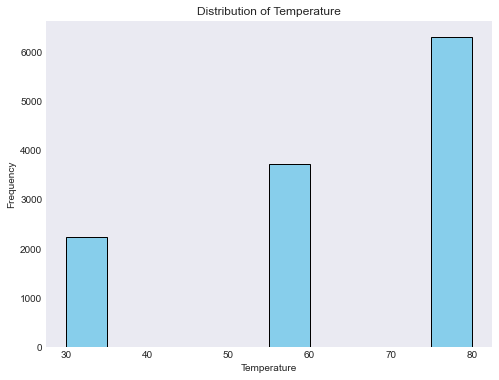

In [11]:
# histogram of the temperature column
plt.figure(figsize=(8, 6))
plt.hist(augmented_data['temperature'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_df = augmented_data[augmented_data.coupon == "Bar"].copy()
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


Proportion of observations that accepted the coupon: 40.83%


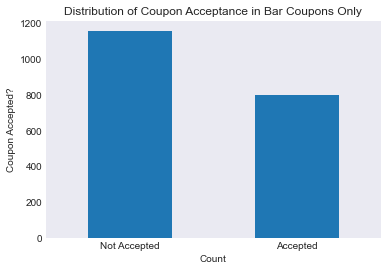

In [13]:
# plot the Coupon Acceptance distribution
col = bar_df['Y'].apply(lambda v: "Accepted" if v else "Not Accepted") 
ax = col.value_counts().plot(kind='bar', title="Distribution of Coupon Acceptance in Bar Coupons Only")
ax.set_xlabel("Count")
ax.set_ylabel("Coupon Accepted?")
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)

# calculate the proportion of observations that accepted the coupon
acceptance_rate = bar_df['Y'].mean()*100
print(f"Proportion of observations that accepted the coupon: {acceptance_rate:.02f}%")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
# check the value of the Bar
bar_df.Bar.value_counts()

Bar
never    813
less1    564
1~3      379
4~8      150
gt8       46
Name: count, dtype: int64

Acceptance rate of those who went 3 or less times a month: 36.85%
Acceptance rate of those who went more than times a month: 76.53%


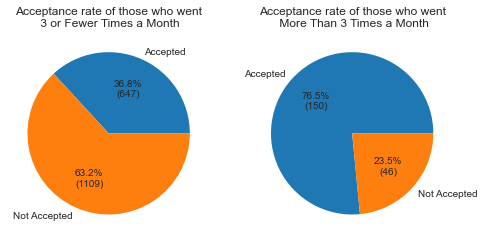

In [15]:
# calculate acceptance rate for those who went to a bar 3 or fewer times
subset = ["never", "less1", "1~3"]
bar_groups = bar_df.Bar.apply(lambda v: "Less than 3" if v in subset else "More than 3") 
acceptance_rate_3_or_less = bar_df[bar_groups == "Less than 3"].Y.mean()*100
acceptance_rate_more_than_3 = bar_df[bar_groups == "More than 3"].Y.mean()*100
print(f"Acceptance rate of those who went 3 or less times a month: {acceptance_rate_3_or_less:.02f}%")
print(f"Acceptance rate of those who went more than times a month: {acceptance_rate_more_than_3:.02f}%")

# plot the acceptance rate
sizes_less_than_3 = [acceptance_rate_3_or_less, 100 - acceptance_rate_3_or_less]
sizes_more_than_3 = [acceptance_rate_more_than_3, 100 - acceptance_rate_more_than_3]

def autopct_formatter(total):
    def formatter(pct):
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:d})'
    return formatter

# create subplots for horizontal pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
fig.patch.set_facecolor('white')

# pie chart for 3 or fewer times a month
total = bar_df[bar_groups == "Less than 3"].shape[0]
ax1.pie(sizes_less_than_3, labels=['Accepted', 'Not Accepted'], autopct=autopct_formatter(total))
ax1.set_title('Acceptance rate of those who went\n 3 or Fewer Times a Month')

# pie chart for more than 3 times a month
total = bar_df[bar_groups == "More than 3"].shape[0]
ax2.pie(sizes_more_than_3, labels=['Accepted', 'Not Accepted'], autopct=autopct_formatter(total))
ax2.set_title('Acceptance rate of those who went\n More Than 3 Times a Month')

# display
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [16]:
# check age values
augmented_data.age.value_counts()

age
21         2537
26         2509
31         1946
50plus     1732
36         1319
41         1087
46          664
below21     504
Name: count, dtype: int64

Acceptance rate of those over 25 and go more than once a month: 69.21%
Acceptance rate of the other people: 33.38%


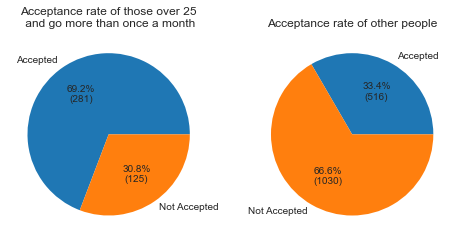

In [17]:
# map age values and convert to integer
mapper = {"50plus": 51,"below21": 20}
preprocessed_age = bar_df.age.str.strip().apply(lambda v: mapper[v] if v in mapper else int(v))

# get age mask of people older than 25
age_mask = preprocessed_age>25
frequent_bar_goers = bar_df.Bar.isin(["1~3", "4~8", "gt8"])

# calculate acceptance rate for those who go more than once a month
# and over the age of 25
acceptance_rate_age25_more_than_once = bar_df[frequent_bar_goers&age_mask].Y.mean()*100
acceptance_rate_others = bar_df[~(frequent_bar_goers&age_mask)].Y.mean()*100

# print calculated rates
print(f"Acceptance rate of those over 25 and go more than once a month: {acceptance_rate_age25_more_than_once:.02f}%")
print(f"Acceptance rate of the other people: {acceptance_rate_others:.02f}%")

# plot the acceptance rates
sizes1 = [acceptance_rate_age25_more_than_once, 100 - acceptance_rate_age25_more_than_once]
sizes2 = [acceptance_rate_others, 100 - acceptance_rate_others]

# create subplots for horizontal pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
fig.patch.set_facecolor('white')

# first pie chart
total = bar_df[frequent_bar_goers&age_mask].shape[0]
ax1.pie(sizes1, labels=['Accepted', 'Not Accepted'], autopct=autopct_formatter(total))
ax1.set_title('Acceptance rate of those over 25\n and go more than once a month')

# second pie chart
total = bar_df[~(frequent_bar_goers&age_mask)].shape[0]
ax2.pie(sizes2, labels=['Accepted', 'Not Accepted'], autopct=autopct_formatter(total))
ax2.set_title('Acceptance rate of other people')

# display
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<Axes: title={'center': 'Histogram of passenger types'}, xlabel='Count', ylabel='passanger'>

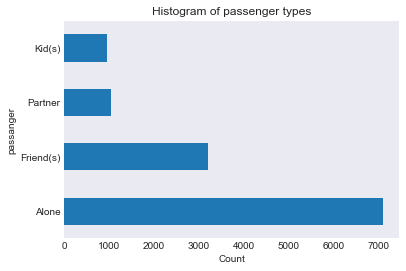

In [18]:
# check passenger data
augmented_data.passanger.value_counts().plot(
    kind="barh",
    xlabel="Count",
    title="Histogram of passenger types"
)

<Axes: title={'center': 'Histogram of occupation types'}, xlabel='Count', ylabel='occupation'>

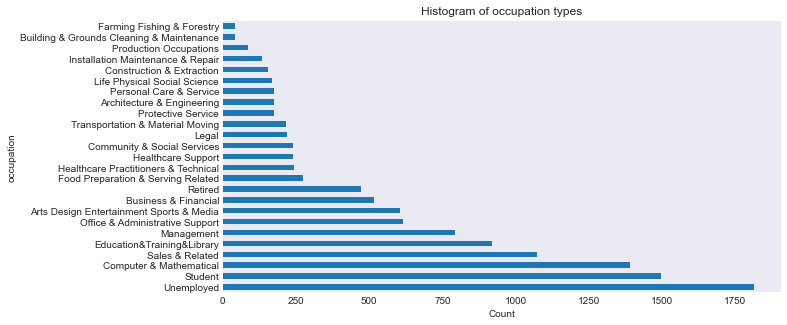

In [19]:
# check occupation data
augmented_data.occupation.value_counts().plot(
    kind="barh",
    xlabel="Count",
    title="Histogram of occupation types",
    figsize=(10,5)
)

In [20]:
# check passenger data
augmented_data.passanger.value_counts()

passanger
Alone        7093
Friend(s)    3196
Partner      1049
Kid(s)        960
Name: count, dtype: int64

Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 68.70%
Acceptance rate of the other people: 29.19%


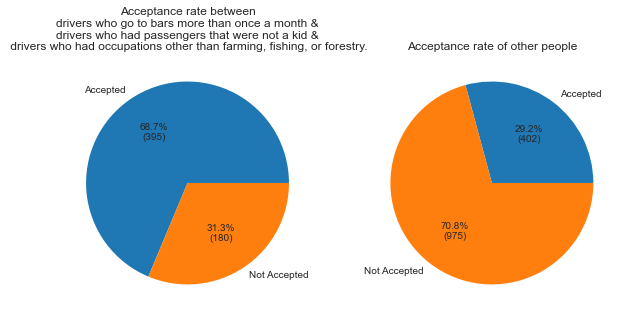

In [21]:
# calculate the mask for those who have occupation other than farming, fishing and forestry
occupation_mask = bar_df.occupation!="Farming Fishing & Forestry"

# calculate the mask for not kids passengers
not_kids_mask = bar_df.passanger!="Kids(s)"

# we already have the bar mask for those who go more than once a month
subset_mask = not_kids_mask&occupation_mask&frequent_bar_goers

acceptance_rate_of_subset = bar_df[subset_mask].Y.mean()*100
acceptance_rate_others = bar_df[~subset_mask].Y.mean()*100

# print calculated rates
print(f"Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {acceptance_rate_of_subset:.02f}%")
print(f"Acceptance rate of the other people: {acceptance_rate_others:.02f}%")

# plot the acceptance rates
sizes1 = [acceptance_rate_of_subset, 100 - acceptance_rate_of_subset]
sizes2 = [acceptance_rate_others, 100 - acceptance_rate_others]

# create subplots for horizontal pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.patch.set_facecolor('white')

# first pie chart
total = bar_df[subset_mask].shape[0]
ax1.pie(sizes1, labels=['Accepted', 'Not Accepted'], autopct=autopct_formatter(total))
ax1.set_title('Acceptance rate between\ndrivers who go to bars more than once a month &\ndrivers who had passengers that were not a kid &\n drivers who had occupations other than farming, fishing, or forestry.')

# second pie chart
total = bar_df[~subset_mask].shape[0]
ax2.pie(sizes2, labels=['Accepted', 'Not Accepted'], autopct=autopct_formatter(total))
ax2.set_title('Acceptance rate of other people')

# display
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



<Axes: title={'center': 'Histogram of martial status of drivers in the dataset'}, xlabel='Count', ylabel='maritalStatus'>

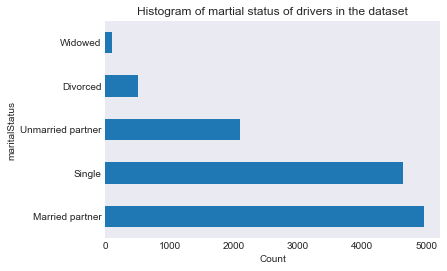

In [22]:
augmented_data.maritalStatus.value_counts().plot(
    kind="barh",
    xlabel="Count",
    title="Histogram of martial status of drivers in the dataset"
)

<Axes: title={'center': 'Histogram of frequency of drivers who go to restaurants less than $20'}, xlabel='Count', ylabel='RestaurantLessThan20'>

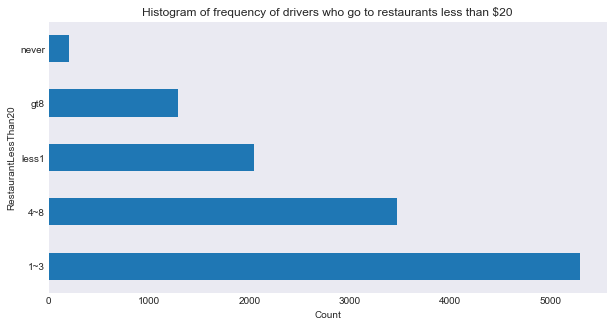

In [23]:
augmented_data.RestaurantLessThan20.value_counts().plot(
    kind="barh",
    xlabel="Count",
    title="Histogram of frequency of drivers who go to restaurants less than $20",
    figsize=(10, 5)
)

<Axes: title={'center': 'Histogram of drivers income in the dataset'}, xlabel='Count', ylabel='income'>

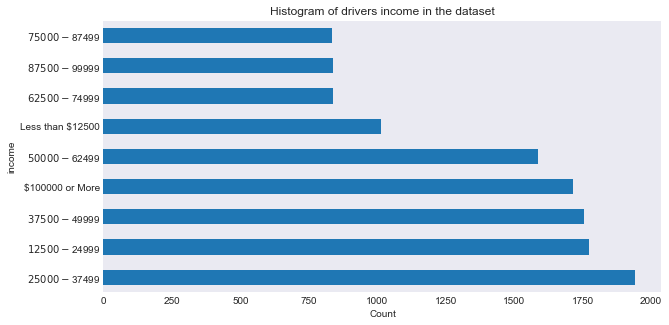

In [24]:
augmented_data.income.value_counts().plot(
    kind="barh",
    xlabel="Count",
    title="Histogram of drivers income in the dataset",
    figsize=(10, 5)
)

In [25]:
# add a new column for the minimum income for a driver
bar_df["min_income"] = bar_df.income.str.split(" ").apply(lambda v: v[0] if v[0][0] == "$" else v[-1])

# remove dollar sign and convert to integer
bar_df["min_income"] = bar_df["min_income"].apply(lambda v: int(v[1:]))

# calculate the mask for people who earn less than 50K
income_less_than_50k = bar_df["min_income"]<50_000

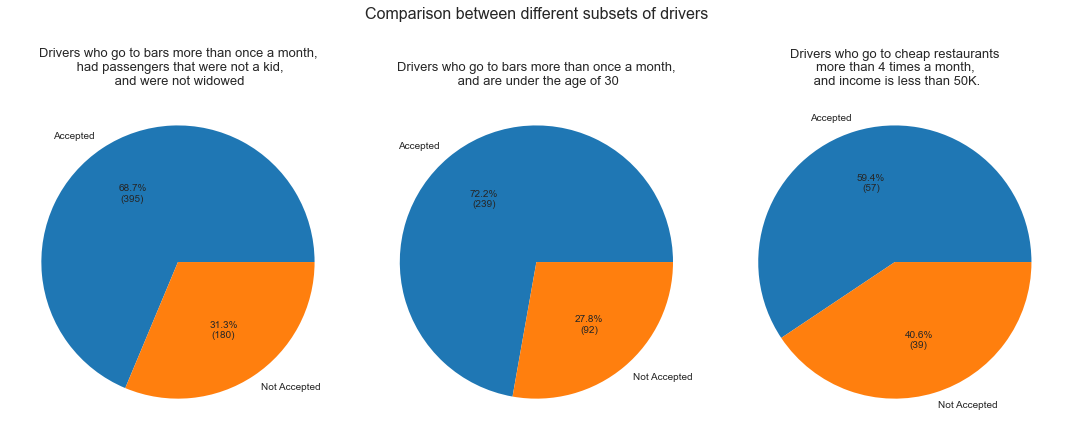

In [26]:
# calculate not widowed mask
not_widowed_mask = bar_df.maritalStatus!="Widowed"

# calculate subset masks
# - go to bars more than once a month, had passengers that were not a kid, and were not widowed
subset1_mask = frequent_bar_goers&not_kids_mask&not_widowed_mask

# - go to bars more than once a month and are under the age of 30
under_30_age_mask = preprocessed_age<30
subset2_mask = frequent_bar_goers&under_30_age_mask

# - go to cheap restaurants more than 4 times a month and income is less than 50K. 
frequent_cheap_restaurant_goers = bar_df.RestaurantLessThan20.isin(["4-8", "gt8"])
subset3_mask = frequent_cheap_restaurant_goers&income_less_than_50k

# make three pie charts comparing each subset
subsets = [subset1_mask, subset2_mask, subset3_mask]
titles = [
    "Drivers who go to bars more than once a month,\n had passengers that were not a kid,\n and were not widowed",
    "Drivers who go to bars more than once a month,\n and are under the age of 30",
    "Drivers who go to cheap restaurants\nmore than 4 times a month,\n and income is less than 50K."
]

fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
fig.suptitle("Comparison between different subsets of drivers", fontsize=16,)
fig.patch.set_facecolor('white')
for ax, title, subset_mask in zip(axis.flat, titles, subsets):
    # calculate subset acceptance rate
    subset = bar_df[subset_mask]
    acceptance_rate = (subset.Y==1).sum()
    total = subset.shape[0]

    # make a pie chart on the current axis
    sizes = [acceptance_rate, subset.shape[0] - acceptance_rate]
    ax.pie(sizes, labels=['Accepted', 'Not Accepted'], autopct=autopct_formatter(total))
    ax.set_title(title, fontsize=13)

plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [27]:
# drivers who accepted the bar coupons are:
# 1. people who regularly go to bars 
# 2. people who do not have kids
# 3. people who have low annual income (<50K)
# 4. people who are young in age
# Basically, its mostly young people who do not have many responsibilities (like taking care of their kids) and 
# who want to have fun in their youth.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Investigate the coffee coupons for drivers who:

- go to coffee houses less than once a month, had passengers that were kids, and were widowed *OR*
- go to expensive restaurants more than 8 times a month and income is more than 50K *OR*
- go to coffee houses more than once a month and are under the age of 30 *OR*
- go to on a sunny weather, their gender is Male, and are Single *OR*
- go to on a sunny weather, their gender is Male, are Single, and are traveling alone *OR*
- go to on a rainy weather, their gender is Female, and are Single, and are trailing with friends *OR*
- go to cheap restaurants more than 4 times a month and income is more than 100K. *OR*
- go to not urgent place, over the age of 30, and traveling with friends *OR*
- go to home, over the age of 30, traveling alone, and after 6 PM

In [28]:
augmented_data.destination.value_counts()

destination
No Urgent Place    6074
Home               3149
Work               3075
Name: count, dtype: int64

<Axes: title={'center': 'Histogram of frequencies of drivers for Restaurants from \\$20 to \\$50'}, xlabel='Count', ylabel='Restaurant20To50'>

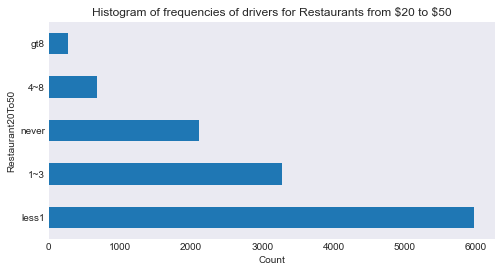

In [29]:
augmented_data.Restaurant20To50.value_counts().plot(
    kind="barh",
    xlabel="Count",
    figsize=(8, 4),
    title="Histogram of frequencies of drivers for Restaurants from \$20 to \$50"
)

In [30]:
augmented_data.maritalStatus.value_counts()

maritalStatus
Married partner      4963
Single               4631
Unmarried partner    2092
Divorced              504
Widowed               108
Name: count, dtype: int64

In [31]:
# get a subset of the dataset for coffee coupons
coffee_df = augmented_data[augmented_data.coupon == "Coffee House"].copy()

# get the minimum income from the income column
coffee_df["min_income"] = coffee_df.income.str.split(" ").apply(lambda v: v[0] if v[0][0] == "$" else v[-1])

# remove dollar sign and convert to integer
coffee_df["min_income"] = coffee_df["min_income"].apply(lambda v: int(v[1:]))

# convert the age to integers
coffee_df.age = coffee_df.age.str.strip().apply(lambda v: mapper[v] if v in mapper else int(v))

coffee_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,62500
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,62500
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,62500
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,62500
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,62500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,4~8,gt8,less1,1,1,0,0,1,0,100000
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,4~8,gt8,less1,1,0,0,1,0,0,100000
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,0,75000
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,75000


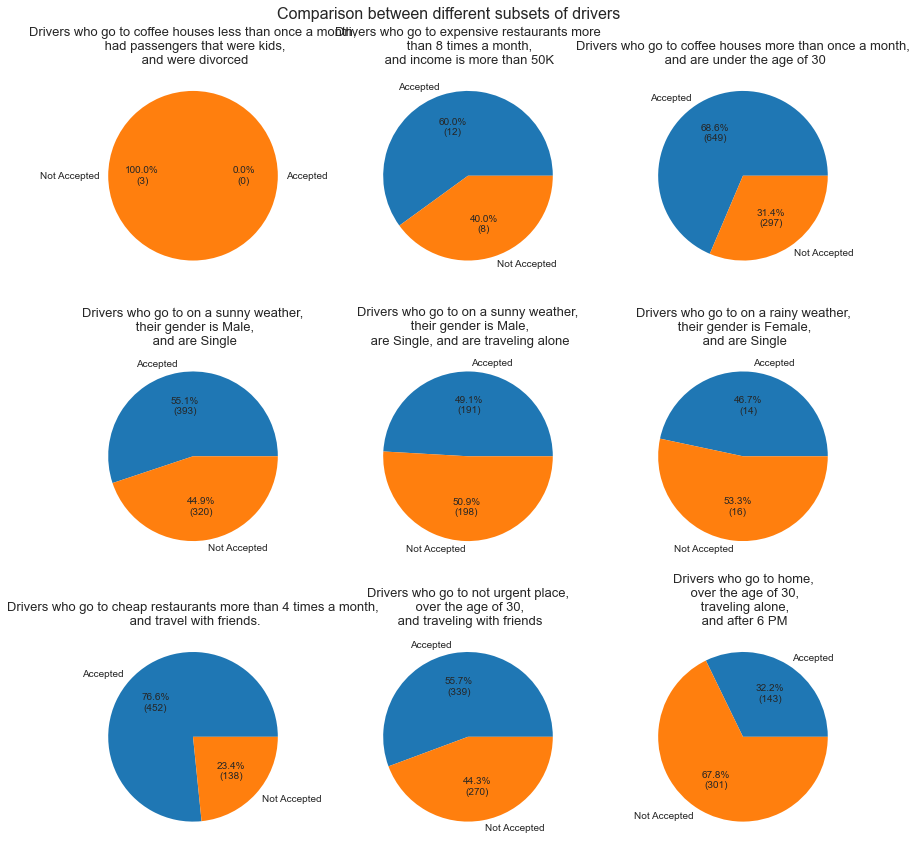

In [32]:
frequent_coffee_house_goers = coffee_df.CoffeeHouse.isin(["1~3", "4~8", "gt8"])

titles_and_masks = [
    (
        "Drivers who go to coffee houses less than once a month,\n had passengers that were kids,\n and were divorced",
        (~frequent_coffee_house_goers)&(coffee_df.passanger=="Kid(s)")&(coffee_df.maritalStatus=="Divorced")
    ),
    (
        "Drivers who go to expensive restaurants more\n than 8 times a month,\n and income is more than 50K",
        (coffee_df.Restaurant20To50=="gt8")&(coffee_df.min_income>50_000)
    ),
    (
        "Drivers who go to coffee houses more than once a month,\n and are under the age of 30",
        (frequent_coffee_house_goers)&(coffee_df.age<30)
    ),
    (
        "Drivers who go to on a sunny weather,\n their gender is Male,\n and are Single",
        (coffee_df.weather=="Sunny")&(coffee_df.gender=="Male")\
        &(coffee_df.maritalStatus=="Single"),
    ),
    (
        "Drivers who go to on a sunny weather,\n their gender is Male,\n are Single, and are traveling alone",
        (coffee_df.weather=="Sunny")&(coffee_df.gender=="Male")\
        &(coffee_df.maritalStatus=="Single")&(coffee_df.passanger=="Alone"),
    ),
    (
        "Drivers who go to on a rainy weather,\n their gender is Female,\n and are Single",
        (coffee_df.weather=="Rainy")&(coffee_df.gender=="Female")\
        &(coffee_df.maritalStatus=="Single"),
    ),
    (
        "Drivers who go to cheap restaurants more than 4 times a month,\n and travel with friends.",
        (frequent_coffee_house_goers)&(coffee_df.passanger=="Friend(s)"),
    ),
    (
        "Drivers who go to not urgent place,\n over the age of 30,\n and traveling with friends",
        (coffee_df.destination=="No Urgent Place")&(coffee_df.age>30)&(coffee_df.passanger=="Friend(s)"),
    ),
    (
        "Drivers who go to home,\n over the age of 30,\n traveling alone,\n and after 6 PM",
        (coffee_df.destination=="Home")&(coffee_df.age>30)\
        &(coffee_df.passanger=="Alone")&(coffee_df.time.isin(["6PM", "10PM"]))
    ),
]

# make a 3x3 grid of pie charts comparing each subset
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
fig.suptitle("Comparison between different subsets of drivers", fontsize=16,)
fig.patch.set_facecolor('white')
for ax, (title, subset_mask) in zip(axis.flat, titles_and_masks):
    # calculate subset acceptance rate
    subset = coffee_df[subset_mask]
    acceptance_rate = (subset.Y==1).sum()
    total = subset.shape[0]

    # make a pie chart on the current axis
    sizes = [acceptance_rate, subset.shape[0] - acceptance_rate]
    ax.pie(sizes, labels=['Accepted', 'Not Accepted'], autopct=autopct_formatter(total))
    ax.set_title(title, fontsize=13)

plt.tight_layout()
plt.show()

Visualize a correlation heatmap between all variables

<Axes: title={'center': 'Distribution of Coupons in the dataset'}, xlabel='Count', ylabel='coupon'>

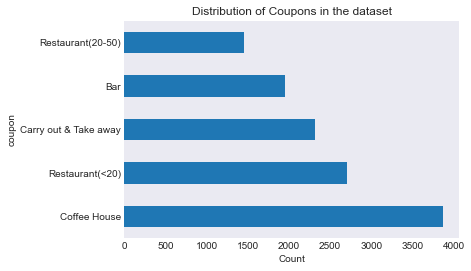

In [33]:
augmented_data.coupon.value_counts().plot(
    kind="barh",
    xlabel="Count",
    title="Distribution of Coupons in the dataset"
)

In [34]:
# first, clean the dataframe
preprocessed_df = augmented_data.copy()
preprocessed_df.gender = preprocessed_df.gender.apply(lambda v: v=="Male")

# set the age to the preprocessed age
preprocessed_df.age = preprocessed_df.age.str.strip().apply(lambda v: mapper[v] if v in mapper else int(v))

# check if direction_same is the inverse of direction_opp
assert (augmented_data.direction_same.astype(bool) == \
      ~(augmented_data.direction_opp.astype(bool)))\
        .value_counts().values[0] == augmented_data.shape[0]

# get the minimum income from the income column
preprocessed_df["min_income"] = preprocessed_df.income.str.split(" ").apply(lambda v: v[0] if v[0][0] == "$" else v[-1])

# remove dollar sign and convert to integer
preprocessed_df["min_income"] = preprocessed_df["min_income"].apply(lambda v: int(v[1:]))

# drop unnecessary columns
preprocessed_df = preprocessed_df.drop(
    columns=[
        # remove the income columns, min_income can substitute
        "income",

        # remove direction_same since its the inverse of direction_opp
        "direction_same"
    ]
)

# make a sparse dataframe and expand categorical columns
preprocessed_df = pd.get_dummies(preprocessed_df)

preprocessed_df

,temperature,gender,age,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_opp,Y,min_income,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
22,55,True,21,0,1,0,0,1,1,62500,...,False,True,False,False,False,False,False,False,True,False
23,80,True,21,0,1,0,0,1,0,62500,...,False,True,False,False,False,False,False,False,True,False
24,80,True,21,0,1,0,0,1,1,62500,...,False,True,False,False,False,False,False,False,True,False
25,80,True,21,0,1,1,0,1,0,62500,...,False,True,False,False,False,False,False,False,True,False
26,80,True,21,0,1,0,0,1,0,62500,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,55,True,26,0,1,0,0,0,1,75000,...,False,True,False,False,False,True,False,False,False,False
12680,55,True,26,0,1,0,0,1,1,75000,...,False,True,False,False,False,True,False,False,False,False
12681,30,True,26,0,1,0,0,0,0,75000,...,False,True,False,False,False,True,False,False,False,False
12682,30,True,26,0,1,1,1,1,0,75000,...,False,True,False,False,False,True,False,False,False,False


<ipython-input-35-65f7f4006a51>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Y', y=corr.index, data=corr, palette="coolwarm", orient="h")


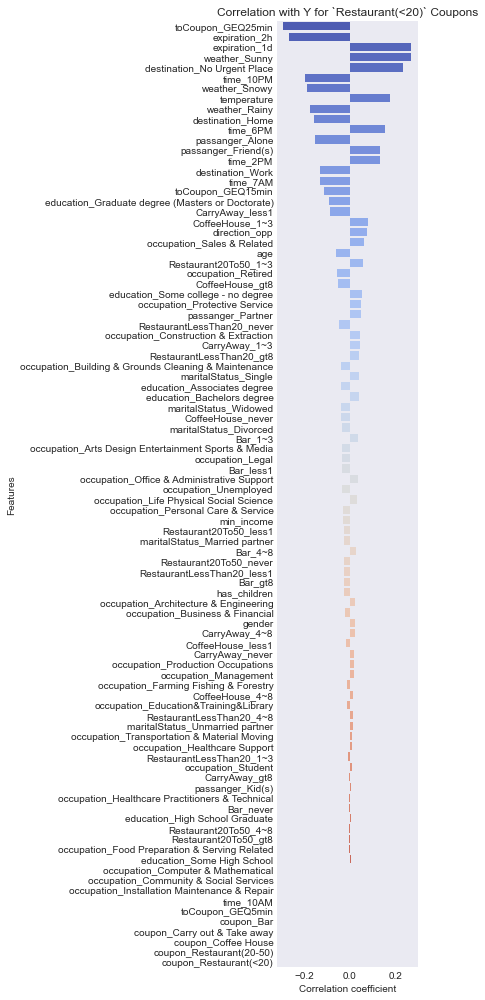

<ipython-input-35-65f7f4006a51>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Y', y=corr.index, data=corr, palette="coolwarm", orient="h")


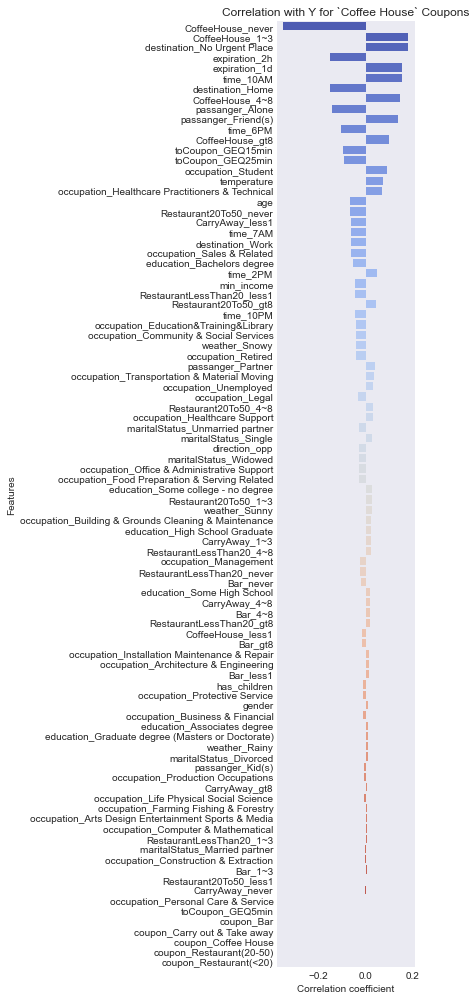

<ipython-input-35-65f7f4006a51>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Y', y=corr.index, data=corr, palette="coolwarm", orient="h")


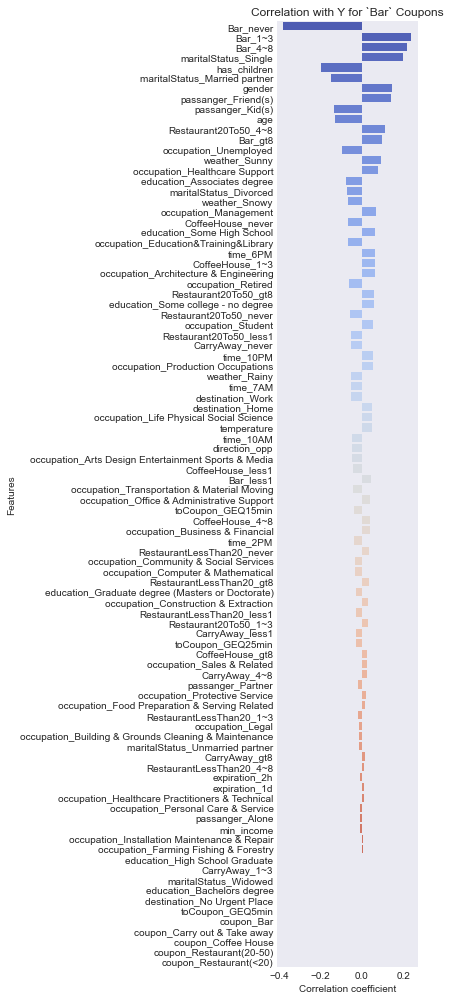

<ipython-input-35-65f7f4006a51>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Y', y=corr.index, data=corr, palette="coolwarm", orient="h")


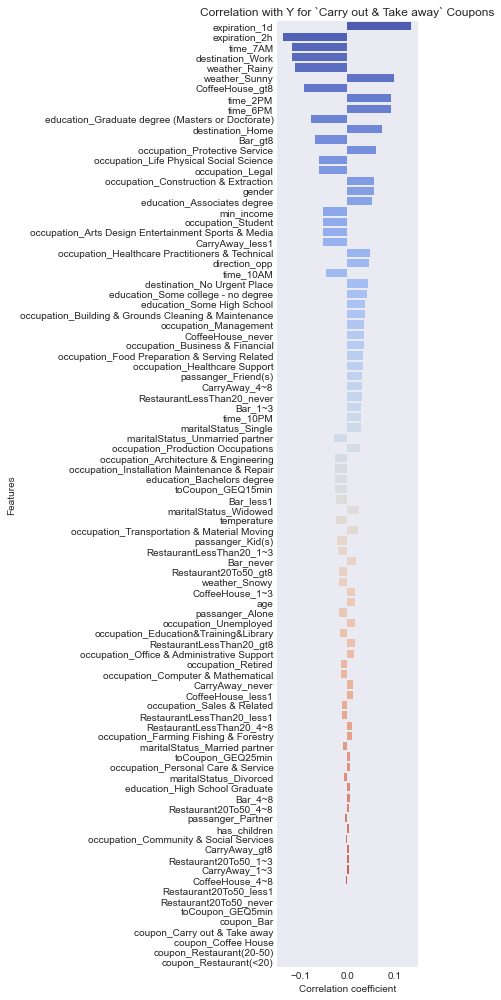

<ipython-input-35-65f7f4006a51>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Y', y=corr.index, data=corr, palette="coolwarm", orient="h")


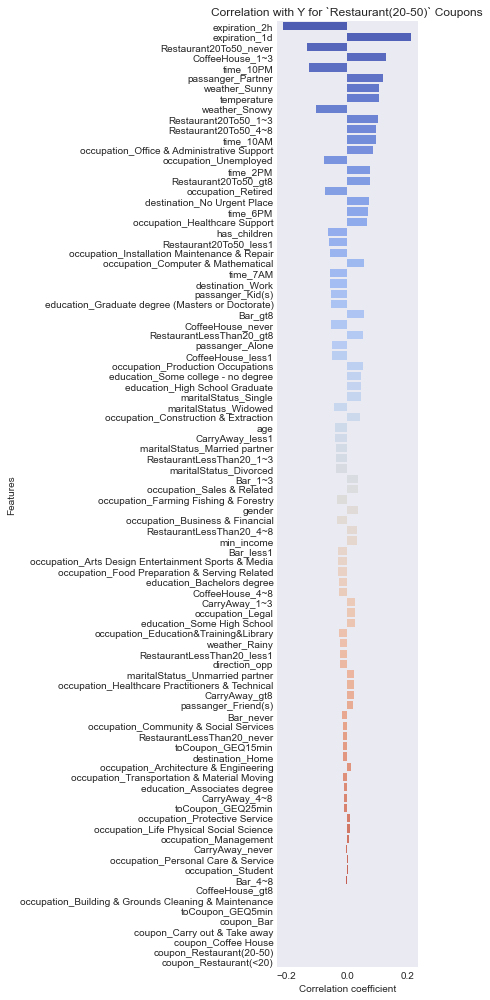

In [35]:
def plot_corr_for_coupon_group(df, coupon_group):
    coupon_group_df = df[df[coupon_group] == True]

    # calculate correlation between column 'Y' and all other columns
    corr = coupon_group_df.corr()[['Y']]
    corr = corr.drop(index='Y')

    # sort the correlation values for better visualization (optional)
    corr = corr.sort_values(by='Y', ascending=False)

    # sort by absolute values but keep the signs for visualization
    corr = corr.reindex(corr['Y'].abs().sort_values(ascending=False).index)

    # create a bar plot using seaborn
    plt.figure(figsize=(6,14))
    sns.barplot(x='Y', y=corr.index, data=corr, palette="coolwarm", orient="h")

    # add a title and labels
    plt.title(f"Correlation with Y for `{coupon_group[7:]}` Coupons")
    plt.xlabel("Correlation coefficient")
    plt.ylabel("Features")

    # display
    plt.tight_layout()
    plt.show()

for coupon_group in augmented_data.coupon.unique():
    plot_corr_for_coupon_group(preprocessed_df, "coupon_"+coupon_group)

# Conclusion

From the previous charts and investigations, we can see that the top 5 factors of whether someone will accept the coupons or not, (based on coupon type)are:

1. "Restaurant(<20)" coupons:
   - be within 25minutes (high -ve corr)
   - expiration date within two hours (high -ve corr)
   - expiration date within one day (high +ve corr)
   - sunny weather (high +ve corr)
   - driver not going to an urgent place (high +ve corr)

2. "Coffee House" coupons:
   - never went to coffee houses (high -ve corr)
   - goes to coffee houses 1~3 times a month (high +ve corr)
   - driver not going to an urgent place (high +ve correlation)
   - expiration date within 2 hours (high -ve corr)
   - expiration date within one day (high +ve corr)

3. "Bar" coupons:
   - never went to bars before (high -ve corr)
   - goes to bars houses 1~3 times a month (high +ve corr)
   - goes to bars houses 4~8 times a month (high +ve corr)
   - single drivers (marital status) (high +ve corr)
   - driver has children (high -ve corr)

4. "Carry out & Take away" Coupons:
   - expiration date within one day (high +ve corr)
   - expiration date within 2 hours (high -ve corr)
   - driving at 7 AM (high -ve corr)
   - driver going to work (high -ve corr)
   - rainy weather (high -ve corr)

5. "Restaurant(20-50)" Coupons:
   - expiration date within 2 hours (high -ve corr)
   - expiration date within one day (high +ve corr)
   - driver never went to 20to50 restaurant before (high -ve corr)
   - driver goes to coffee houses 1~3 times a month (high +ve corr)
   - driver driving at 10 PM (high -ve corr)
     
#Overall Conclusions:

Demographic Insights: Age, gender, income, and marital status significantly influence coupon acceptance. Tailoring campaigns to these demographics can improve effectiveness.

Behavioral Patterns: Factors like time of day, weather, and destination play a crucial role in coupon acceptance. Understanding these patterns allows for more strategic timing and targeting of promotions.

Targeted Marketing: The analysis highlights the importance of segmenting the audience based on various factors. Personalized offers and timing can significantly enhance coupon effectiveness, leading to higher engagement and conversion 
tance rates.ratance rates.

Recommendations Next Steps:

Target specific coupon types and times of day to increase acceptance rates.

Consider weather conditions when distributing coupons.

Tailor coupon offerings to customers with passengers to increase acceptance rates.